In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import random
import plotly.express as px
from matplotlib import pyplot as plt
from datetime import date
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import datetime


In [2]:
df=pd.read_csv("C:/Users/Sneha/Download/10k_borrowers_data.csv")

In [3]:
df.head()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Mannat Raja,04-07-1993,Female,Married,7.337991e+08,mdeshpande@example.org,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,25-11-2000,Female,Widowed,3.707545e+09,ganeshvivaan@example.org,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,14-01-1976,Female,Married,6.316296e+08,neysasankaran@example.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,05-12-2003,Female,Divorced,9.190038e+11,shamikbath@example.org,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,14-11-1991,Female,Single,9.135364e+11,jivin77@example.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5105 entries, 0 to 5104
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          5105 non-null   object 
 1   Date of Birth                 5104 non-null   object 
 2   Gender                        5104 non-null   object 
 3   Marital Status                5104 non-null   object 
 4   Phone Number                  5104 non-null   float64
 5   Email Address                 5104 non-null   object 
 6   Mailing Address               5104 non-null   object 
 7   Language Preference           5104 non-null   object 
 8   Geographical Location         5104 non-null   object 
 9   Credit Score                  5104 non-null   float64
 10  Loan Type                     5104 non-null   object 
 11  Loan Amount                   5104 non-null   float64
 12  Loan Term                     5104 non-null   float64
 13  Int

## Email IDs are wrong entered - replace all email id domains as gmail.com (do it using code only)

For eg: mdeshpande@example.org -> mdeshpande@gmail.com


In [5]:
def replaceEmail(x):
    return re.sub("@.*$" ,"@gmail.com",str(x));

In [7]:
df['Email Address']

0          mdeshpande@example.org
1        ganeshvivaan@example.org
2       neysasankaran@example.com
3          shamikbath@example.org
4             jivin77@example.com
                  ...            
5100        samaira17@example.com
5101        wsankaran@example.net
5102           tkrish@example.com
5103       elachander@example.net
5104                          NaN
Name: Email Address, Length: 5105, dtype: object

In [8]:
df['Email Address']=df['Email Address'].apply(replaceEmail)

In [9]:
df.head()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Mannat Raja,04-07-1993,Female,Married,7.337991e+08,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,25-11-2000,Female,Widowed,3.707545e+09,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,14-01-1976,Female,Married,6.316296e+08,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,05-12-2003,Female,Divorced,9.190038e+11,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,14-11-1991,Female,Single,9.135364e+11,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes


## Standardize values in Phone no field (it should be a 10 digit number with country code +91)

Please feel free to add 0s in the last to make digit as 10 digit number


In [10]:
def phoneCheck(x):
    lenth=len(x)
    start=x[0:2]
    if(lenth==10 and start=="91"):
        return "+"+x
    if(lenth<10 ):
        add=10-len(x)
        x=x.ljust(add+len(x),'0')

    x="+91"+x
    return x
##here you have to add manythings like check is there 91 there if

In [11]:
print(phoneCheck("35802"))
print(phoneCheck("9183653042"))

+913580200000
+9183653042


In [12]:
df["Phone Number"]=df["Phone Number"].astype(str)

In [13]:
df["Phone Number"]=df["Phone Number"].apply(phoneCheck)

In [14]:
df

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Amount,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,34766.0,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13429.0,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,54579.0,5.0,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,79654.0,8.0,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,51566.0,11.0,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,Pihu Uppal,22-05-1993,Male,Divorced,+916738528748.0,samaira17@gmail.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,64458.0,14.0,0.23,Medical Emergency,5293.18,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,No
5101,Myra Venkatesh,12-09-1970,Male,Widowed,+918882223668.0,wsankaran@gmail.com,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,39734.0,8.0,0.26,Medical Emergency,5463.11,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,No
5102,Shayak Rout,29-03-1963,Female,Married,+91919462199517.0,tkrish@gmail.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,93530.0,7.0,0.27,Medical Emergency,14590.70,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,No
5103,Sana Zachariah,25-06-2002,Male,Widowed,+91917314484468.0,elachander@gmail.com,"H.No. 571, Kanda Zila, Satara-547365",Telugu,Tiruchirappalli,570.0,...,81949.0,15.0,0.15,Debt Consolidation,6025.42,10.116.216.180,"-42.478759, 73.737517","[{'Payment Date': datetime.date(2023, 7, 27), ...",6.0,No


## Add 2 more columns Income Level (IL) and Financial Status (FS). Allocate the data randomly as IL - low, medium, high and FS as stable, semi-stable, unstable)
   


In [15]:
np.random.seed(40) 

In [16]:
df['Income Level']=np.random.choice(["low","medium","high"],df.shape[0])

In [17]:
df.head(2)

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Term,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,15.0,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes,high
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,13.0,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes,medium


In [18]:
df['Financial Status'] = np.random.choice(["stable","semi-stable","unstable"], df.shape[0])

In [19]:
df.head()

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Interest Rate,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,0.28,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes,high,stable
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,0.18,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes,medium,unstable
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,0.27,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes,low,semi-stable
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,0.20,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes,low,stable
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,0.27,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes,high,stable


In [20]:
df=df.dropna()

In [21]:
def birthdaycal(x):
    x=str(x)
    day,month,year = map(int, x.split("-"))
    today = datetime.date.today()
    age = today.year - year - ((today.month, today.day) < (month, day))
    return age

In [22]:
df["age"]=df["Date of Birth"].apply(birthdaycal)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23736\65515990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"]=df["Date of Birth"].apply(birthdaycal)


In [23]:
df.head(5)

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,Yes,high,stable,31
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,Yes,medium,unstable,23
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,Education Fees,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,Yes,low,semi-stable,48
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,Debt Consolidation,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,Yes,low,stable,20
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,Medical Emergency,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,Yes,high,stable,32


## Visualize the borrower data

Borrowers based on age, gender, marital status, language preference, loan type, credit score


Gender
Male      2563
Female    2541
Name: count, dtype: int64


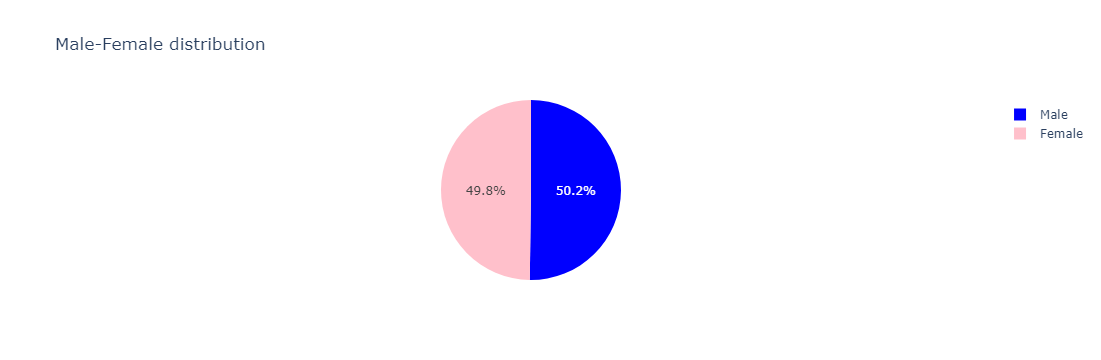

In [25]:
gender_count = df['Gender'].value_counts()
print(gender_count)
colors=["#00008B","#FF69B4"]
fig1 = px.pie(values=gender_count.values,names=gender_count.index, title='Male-Female distribution',color_discrete_sequence=['blue','pink'])
fig1.show()

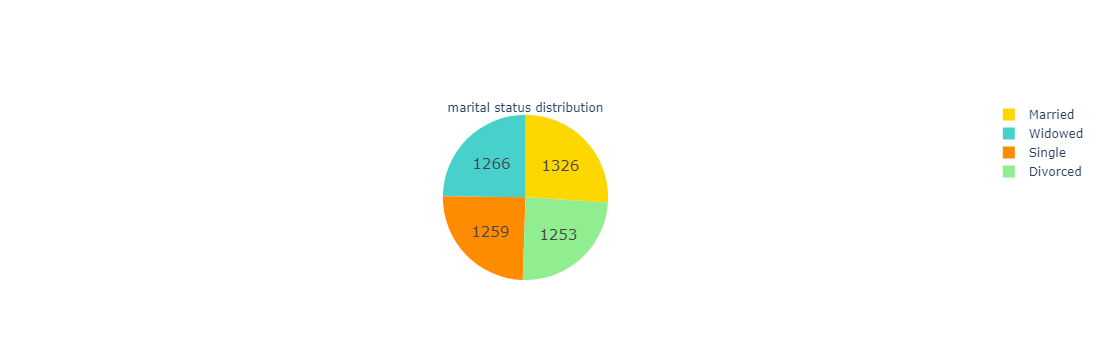

In [26]:
marital_statusc = df['Marital Status'].value_counts()
colors2 = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig2 = go.Figure(data=[go.Pie(labels=marital_statusc.index,
                             values=marital_statusc.values,title='marital status distribution')])
fig2.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=15,
                  marker=dict(colors=colors2))
fig2.show()

Language Preference
Malayalam    555
Gujarati     544
Telugu       537
Bengali      519
Marathi      518
Kannada      516
Hindi        495
Urdu         481
English      475
Tamil        464
Name: count, dtype: int64


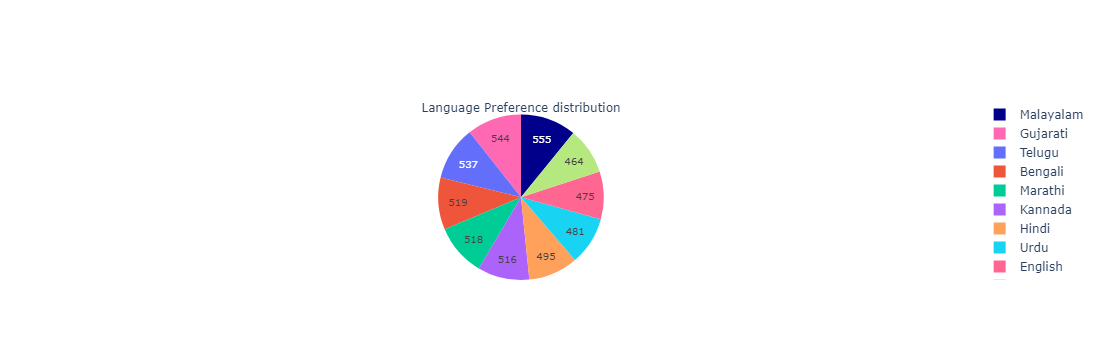

In [27]:
Language_Preference_Cnt = df['Language Preference'].value_counts()
print(Language_Preference_Cnt)
fig3 = go.Figure(data=[go.Pie(labels=Language_Preference_Cnt.index,
                             values=Language_Preference_Cnt.values,title='Language Preference distribution')])
fig3.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=10,
                  marker=dict(colors=colors))
fig3.show()

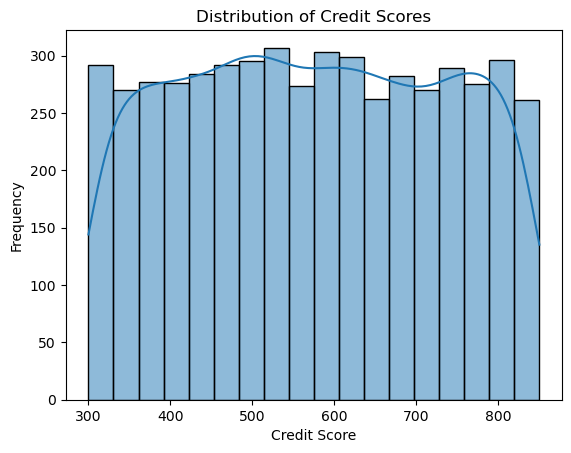

In [28]:
sns.histplot(df["Credit Score"], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

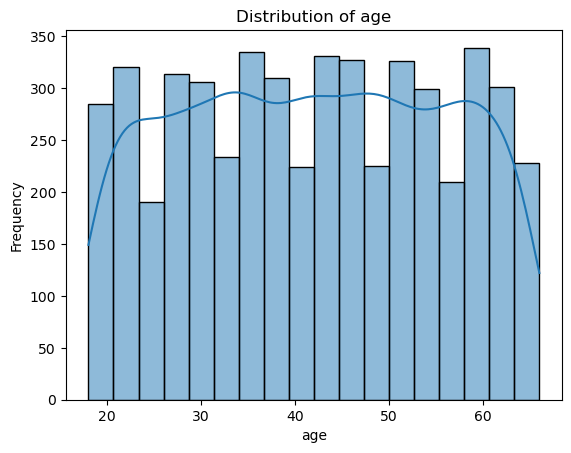

In [29]:
sns.histplot(df["age"], kde=True)
plt.title('Distribution of age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

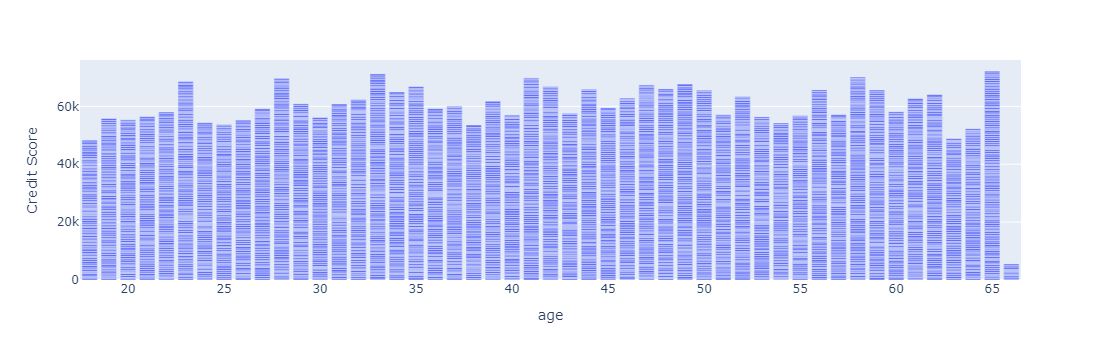

In [30]:
fig4 = px.bar(df, x='age', y='Credit Score')
fig4.show()

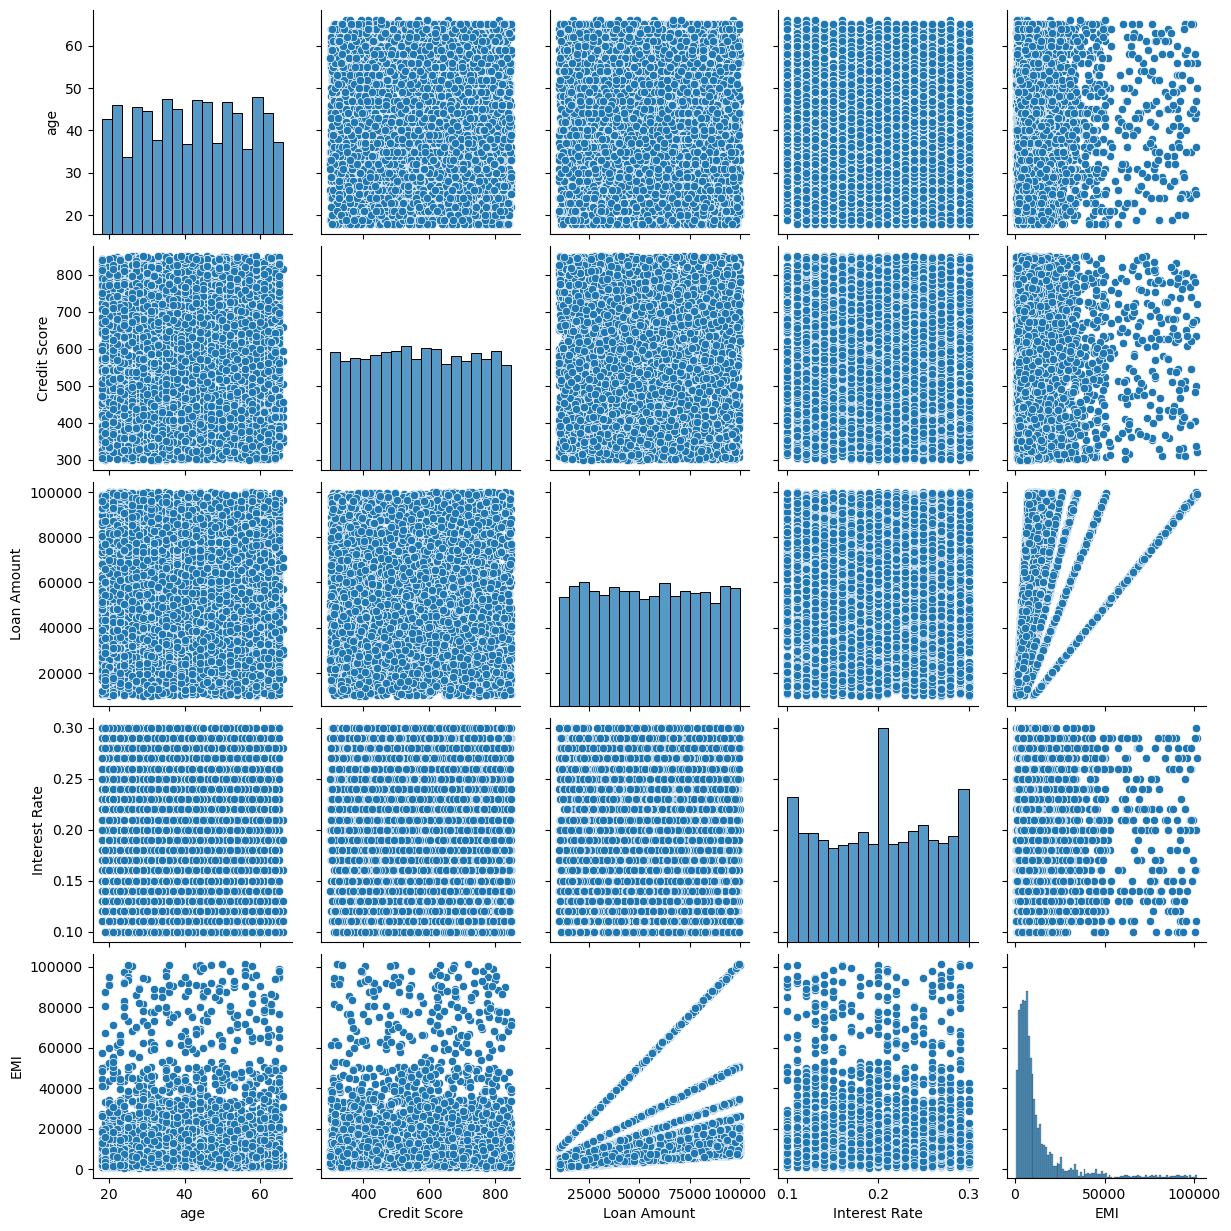

In [31]:
col=["age","Credit Score","Loan Amount","Interest Rate","EMI"]
df1=df[col]
df1.head(3)
sns.pairplot(df1)

## Generate a collection risk score for every borrower and rank borrowers based on this score



In [32]:
df['Delayed Payment'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df['Income Level'].unique()

array(['high', 'medium', 'low'], dtype=object)

In [34]:
df['Financial Status'].unique()

array(['stable', 'unstable', 'semi-stable'], dtype=object)

In [35]:
Delayed_Payment=['Yes', 'No']
Income_Level=['high','medium','low']
Financial_Status=['stable', 'semi-stable', 'unstable']

In [36]:
enc = OrdinalEncoder(categories = [Delayed_Payment],handle_unknown='use_encoded_value',unknown_value=-1)

In [37]:
print(enc.fit_transform(df[['Delayed Payment']]))

[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


In [38]:
df['Delayed Payment'] = enc.fit_transform(df[['Delayed Payment']])
df.head(2)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23736\585138975.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,high,stable,31
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,medium,unstable,23


In [39]:
enc = OrdinalEncoder(categories = [Income_Level],handle_unknown='use_encoded_value',unknown_value=-1)

In [40]:
print(enc.fit_transform(df[['Income Level']])+1)

[[1.]
 [2.]
 [3.]
 ...
 [1.]
 [2.]
 [3.]]


In [41]:
df['Income Level'] = enc.fit_transform(df[['Income Level']])+1
df.head(2)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23736\785237176.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,1.0,stable,31
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,2.0,unstable,23


In [42]:
enc = OrdinalEncoder(categories = [Financial_Status],handle_unknown='use_encoded_value',unknown_value=-1)

In [43]:
print(enc.fit_transform(df[['Financial Status']])+1)

[[1.]
 [3.]
 [2.]
 ...
 [3.]
 [2.]
 [2.]]


In [44]:
df['Financial Status'] = enc.fit_transform(df[['Financial Status']])+1
df.head(2)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23736\1265688271.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,Loan Purpose,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,Medical Emergency,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,1.0,1.0,31
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,Wedding Expenses,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,2.0,3.0,23


In [45]:
def riskCalculator(df):

    return 30/100*df["Delayed Payment"]+20/100*df["Loan Amount"]+20/100*df["Income Level"]+15/100*df["Financial Status"]+15/100*df["Credit Score"]    

In [46]:
df['Risk score']=riskCalculator(df)

C:\Users\Sneha\AppData\Local\Temp\ipykernel_23736\2889142275.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
df.head(10)

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age,Risk score
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,1.0,1.0,31,7027.20
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,2.0,3.0,23,2776.80
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,0.0,3.0,2.0,48,10997.70
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,0.0,3.0,1.0,20,16003.25
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,0.0,1.0,1.0,32,10401.90
5,Stuvan Subramaniam,03-10-1966,Female,Married,+91919143695467.0,udoctor@gmail.com,"383, Kothari Street, Parbhani 093770",Malayalam,Muzaffarnagar,643.0,...,3790.33,10.164.126.221,"5.7022695, 146.478105","[{'Payment Date': datetime.date(2023, 7, 16), ...",11.0,0.0,2.0,1.0,57,8468.20
6,Aayush Tella,22-06-1997,Female,Widowed,+91412600214.0,nirvideep@gmail.com,H.No. 562\nBava Circle\nTenali-740577,Bengali,Bihar Sharif,549.0,...,7344.97,192.168.253.96,"-48.5487855, 28.321063","[{'Payment Date': datetime.date(2023, 7, 27), ...",15.0,0.0,3.0,3.0,27,17867.40
7,Damini Mani,20-03-2004,Male,Widowed,+912950774682.0,buchyakshit@gmail.com,"H.No. 61\nKarnik Chowk, Firozabad-554489",Malayalam,Fatehpur,410.0,...,982.85,10.66.154.126,"-33.681733, 15.590320","[{'Payment Date': datetime.date(2023, 7, 27), ...",11.0,1.0,1.0,1.0,20,2274.55
8,Anay Deshpande,17-05-1984,Male,Single,+91913888823255.0,xdubey@gmail.com,"82/892, Dash Road, Medininagar-463188",Gujarati,Srinagar,358.0,...,85655.51,10.235.80.93,"51.0188995, 117.874459","[{'Payment Date': datetime.date(2023, 7, 28), ...",9.0,0.0,1.0,1.0,40,16821.85
9,Parinaaz Toor,30-04-2001,Male,Divorced,+918615437299.0,indrans30@gmail.com,"H.No. 942, Chanda Street, Bhalswa Jahangir Pur...",Hindi,Darbhanga,688.0,...,8851.50,192.168.65.117,"75.153156, 162.442363","[{'Payment Date': datetime.date(2023, 7, 28), ...",2.0,0.0,2.0,3.0,23,5319.05


In [48]:
##normalizing risk score
df_sklearn = df.copy() 

df_sklearn['Risk score'] = MinMaxScaler().fit_transform(np.array(df_sklearn['Risk score']).reshape(-1,1)) 
 
display(df_sklearn) 

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,EMI,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age,Risk score
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,2773.61,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,1.0,1.0,31,0.275142
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,1144.69,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,2.0,3.0,23,0.039714
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,11663.54,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,0.0,3.0,2.0,48,0.495066
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,10717.90,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,0.0,3.0,1.0,20,0.772321
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,5344.12,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,0.0,1.0,1.0,32,0.462065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,Purab Chowdhury,19-06-1993,Male,Married,+914080453896.0,rania23@gmail.com,H.No. 357\nChana Nagar\nDehri-804020,Telugu,Kirari Suleman Nagar,586.0,...,17172.40,172.27.72.109,"19.459671, -111.751451","[{'Payment Date': datetime.date(2023, 7, 14), ...",2.0,0.0,2.0,1.0,31,0.956392
5100,Pihu Uppal,22-05-1993,Male,Divorced,+916738528748.0,samaira17@gmail.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,5293.18,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,1.0,1.0,3.0,31,0.605854
5101,Myra Venkatesh,12-09-1970,Male,Widowed,+918882223668.0,wsankaran@gmail.com,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,5463.11,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,1.0,1.0,3.0,54,0.330136
5102,Shayak Rout,29-03-1963,Female,Married,+91919462199517.0,tkrish@gmail.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,14590.70,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,1.0,2.0,2.0,61,0.928736


## rank borrowers 

In [49]:
df_sklearn['Rank based on Risk score']=df_sklearn['Risk score'].rank()

In [51]:
df_sklearn

,Name,Date of Birth,Gender,Marital Status,Phone Number,Email Address,Mailing Address,Language Preference,Geographical Location,Credit Score,...,IP Address,Geolocation,Repayment History,Days Left to Pay Current EMI,Delayed Payment,Income Level,Financial Status,age,Risk score,Rank based on Risk score
0,Mannat Raja,04-07-1993,Female,Married,+91733799057.0,mdeshpande@gmail.com,"47/359, Manda Nagar\nPhusro-351513",Hindi,Rourkela,491.0,...,10.128.115.114,"-71.6020475, -51.892151","[{'Payment Date': datetime.date(2023, 7, 2), '...",6.0,0.0,1.0,1.0,31,0.275142,1415.0
1,Kashvi Bera,25-11-2000,Female,Widowed,+913707544917.0,ganeshvivaan@gmail.com,"06/109\nKothari Marg, Amritsar 359591",English,Dewas,601.0,...,10.171.84.107,"17.074404, -140.913933","[{'Payment Date': datetime.date(2023, 7, 3), '...",1.0,0.0,2.0,3.0,23,0.039714,186.0
2,Rasha Bhagat,14-01-1976,Female,Married,+91631629625.0,neysasankaran@gmail.com,"72/566\nBava Marg, Ajmer-034063",Telugu,Guwahati,540.0,...,192.168.173.109,"-84.417644, -53.833944","[{'Payment Date': datetime.date(2023, 7, 7), '...",6.0,0.0,3.0,2.0,48,0.495066,2532.0
3,Ritvik Kalla,05-12-2003,Female,Divorced,+91919003762470.0,shamikbath@gmail.com,"85/222\nSheth Road, Secunderabad 193560",Hindi,Jabalpur,478.0,...,10.113.171.243,"-22.5478035, -136.499639","[{'Payment Date': datetime.date(2023, 7, 21), ...",11.0,0.0,3.0,1.0,20,0.772321,3951.0
4,Tejas De,14-11-1991,Female,Single,+91913536405926.0,jivin77@gmail.com,71/49\nShukla Road\nNoida-018208,Kannada,Guntakal,589.0,...,172.30.115.105,"16.2175855, -52.977905","[{'Payment Date': datetime.date(2023, 7, 19), ...",13.0,0.0,1.0,1.0,32,0.462065,2369.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5099,Purab Chowdhury,19-06-1993,Male,Married,+914080453896.0,rania23@gmail.com,H.No. 357\nChana Nagar\nDehri-804020,Telugu,Kirari Suleman Nagar,586.0,...,172.27.72.109,"19.459671, -111.751451","[{'Payment Date': datetime.date(2023, 7, 14), ...",2.0,0.0,2.0,1.0,31,0.956392,4886.0
5100,Pihu Uppal,22-05-1993,Male,Divorced,+916738528748.0,samaira17@gmail.com,"19, Dhillon Street\nRanchi-830581",Gujarati,Katihar,702.0,...,172.16.196.171,"-50.0698815, -9.882135","[{'Payment Date': datetime.date(2023, 7, 25), ...",8.0,1.0,1.0,3.0,31,0.605854,3114.0
5101,Myra Venkatesh,12-09-1970,Male,Widowed,+918882223668.0,wsankaran@gmail.com,"14\nShah Path, Latur 212670",Hindi,Jamshedpur,482.0,...,192.168.187.174,"86.1737005, -37.589629","[{'Payment Date': datetime.date(2023, 7, 19), ...",8.0,1.0,1.0,3.0,54,0.330136,1710.0
5102,Shayak Rout,29-03-1963,Female,Married,+91919462199517.0,tkrish@gmail.com,"H.No. 448\nGanguly Ganj, Gaya 501189",Telugu,Udaipur,801.0,...,10.53.85.163,"5.5168035, 35.713995","[{'Payment Date': datetime.date(2023, 7, 13), ...",5.0,1.0,2.0,2.0,61,0.928736,4741.0
